In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [40]:
img = cv.imread('../static/canvas/images/input/photo1.jpg')
type(img)

numpy.ndarray

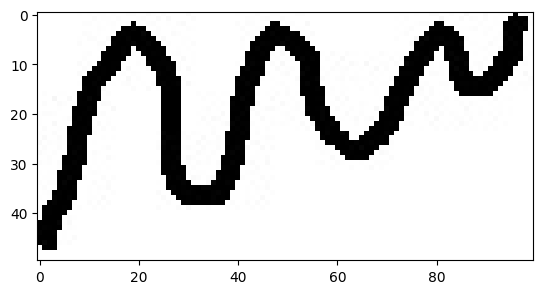

In [44]:
plt.imshow(img)

In [45]:
img.shape

(50, 100, 3)

In [59]:
def translate(img, shiftx, shifty, fillValue=(0,0,0)):
    M = np.float32([[1,0,shiftx],[0,1,shifty]])
    dst = cv.warpAffine(img,M,(img.shape[1],img.shape[0]),borderValue=fillValue)
    return dst

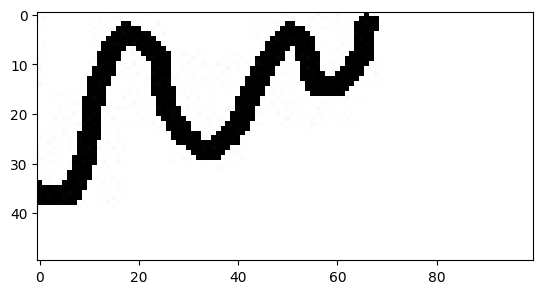

In [60]:
plt.imshow(translate(img,-30,0,(255,255,255)))

In [61]:
def crop(img, left, right, top, bottom):
    return img[0+top:img.shape[0]-bottom,0+left:img.shape[1]-right]

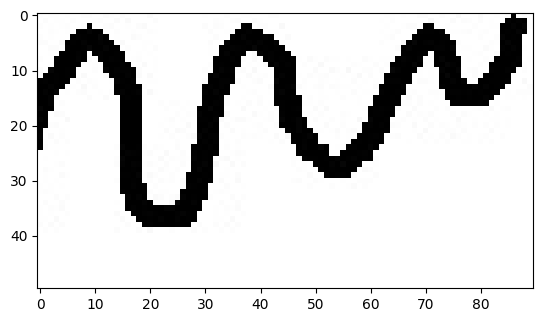

In [62]:
plt.imshow(crop(img,10,0,0,0))

In [63]:
def concat(img1, img2, mode):
    if mode=='vertical':
        return cv.vconcat([img1, img2])
    return cv.hconcat([img1, img2])

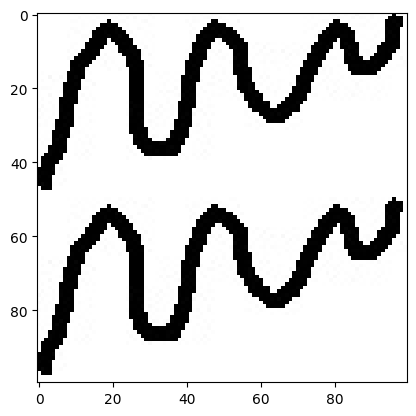

In [65]:
plt.imshow(concat(img,img,'vertical'))

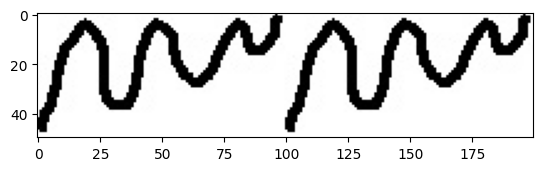

In [66]:
plt.imshow(concat(img,img,'horizontal'))

Thresholding

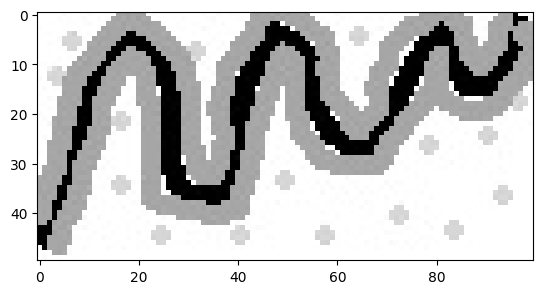

In [71]:
img = cv.imread('../static/canvas/images/input/photo2.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
type(img)
plt.imshow(img_gray,cmap='gray')

(array([3.880e+02, 1.040e+02, 6.600e+01, 5.300e+01, 2.800e+01, 1.000e+01,
        6.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

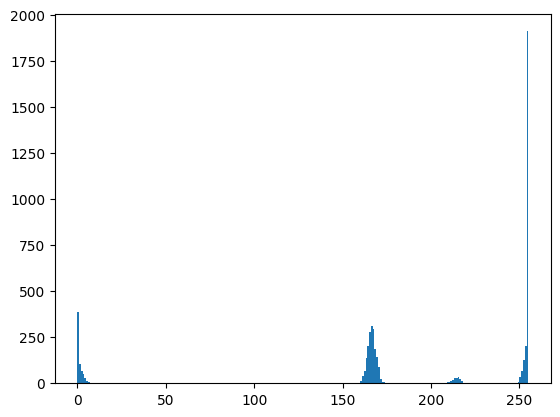

In [81]:
plt.hist(img_gray.flatten(), bins=255)

In [110]:
def fixed_threshold(img, threshold, maxv=255):
    _, r = cv.threshold(img,threshold,maxv,cv.THRESH_BINARY)
    return r

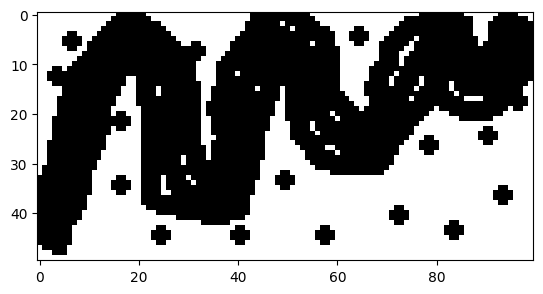

In [114]:
plt.imshow(fixed_threshold(img_gray,240),cmap='gray')

In [115]:
def local_threshold(img, threshold, maxv=255):
    _, r = cv.threshold(img,threshold,maxv,cv.THRESH_BINARY)
    return r

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)